# Understanding Pandas Series and DataFrames - Lab

## Introduction

In this lab, let's get some hands-on practice working with data cleanup using Pandas.

## Objectives
You will be able to:

- Use the `.map()` and `.apply()` methods to apply a function to a pandas Series or DataFrame 
- Perform operations to change the structure of pandas DataFrames 
- Change the index of a pandas DataFrame 
- Change data types of columns in pandas DataFrames 

## Let's get started! 

Import the file `'turnstile_180901.txt'`. 

In [1]:
# Import the required libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Import the file 'turnstile_180901.txt'
df = pd.read_csv('turnstile_180901.txt', dtype=str)

# Print the number of rows ans columns in df
print(df.shape)

# Print the first five rows of df
df.head()

(197625, 11)


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,00:00:00,REGULAR,0006736067,0002283184 ...
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,04:00:00,REGULAR,0006736087,0002283188 ...
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,08:00:00,REGULAR,0006736105,0002283229 ...
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,12:00:00,REGULAR,0006736180,0002283314 ...
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,16:00:00,REGULAR,0006736349,0002283384 ...


Rename all the columns to lower case: 

In [3]:
# Rename all the columns to lower case
df.columns = [col.lower() for col in df.columns]


df.head()

,c/a,unit,scp,station,linename,division,date,time,desc,entries,exits
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,00:00:00,REGULAR,0006736067,0002283184 ...
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,04:00:00,REGULAR,0006736087,0002283188 ...
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,08:00:00,REGULAR,0006736105,0002283229 ...
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,12:00:00,REGULAR,0006736180,0002283314 ...
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,16:00:00,REGULAR,0006736349,0002283384 ...


Change the index to `'linename'`: 

In [4]:
# Change the index to 'linename'
df = df.set_index('linename')


In [5]:
df.head()

,c/a,unit,scp,station,division,date,time,desc,entries,exits
linename,,,,,,,,,,
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,00:00:00,REGULAR,0006736067,0002283184 ...
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,04:00:00,REGULAR,0006736087,0002283188 ...
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,08:00:00,REGULAR,0006736105,0002283229 ...
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,12:00:00,REGULAR,0006736180,0002283314 ...
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,16:00:00,REGULAR,0006736349,0002283384 ...


Reset the index: 

In [6]:
# Reset the index
df = df.reset_index()
df.head()

,linename,c/a,unit,scp,station,division,date,time,desc,entries,exits
0,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,00:00:00,REGULAR,0006736067,0002283184 ...
1,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,04:00:00,REGULAR,0006736087,0002283188 ...
2,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,08:00:00,REGULAR,0006736105,0002283229 ...
3,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,12:00:00,REGULAR,0006736180,0002283314 ...
4,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,16:00:00,REGULAR,0006736349,0002283384 ...


Create another column `'Num_Lines'` that is a count of how many lines pass through a station. Then sort your DataFrame by this column in descending order. 

*Hint: According to the [data dictionary](http://web.mta.info/developers/resources/nyct/turnstile/ts_Field_Description.txt), LINENAME represents all train lines that can be boarded at a given station. Normally lines are represented by one character. For example, LINENAME 456NQR represents trains 4, 5, 6, N, Q, and R.*

In [7]:
df['num_lines'] = df['linename'].map(lambda x: len(x))

df['num_lines'].loc[:5]

0    7
1    7
2    7
3    7
4    7
5    7
Name: num_lines, dtype: int64

Write a function to clean column names: 

In [8]:
def clean(col_name):
    # Clean the column name in any way you want to. Hint: think back to str methods 
    cleaned = col_name.strip()
    return cleaned



In [10]:
# Use the above function to clean the column names
df.head()

,linename,c/a,unit,scp,station,division,date,time,desc,entries,exits,num_lines
0,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,00:00:00,REGULAR,0006736067,0002283184 ...,7
1,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,04:00:00,REGULAR,0006736087,0002283188 ...,7
2,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,08:00:00,REGULAR,0006736105,0002283229 ...,7
3,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,12:00:00,REGULAR,0006736180,0002283314 ...,7
4,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,16:00:00,REGULAR,0006736349,0002283384 ...,7


In [11]:
df.tail()
df.columns = [col.strip() for col in df.columns]

df.columns = [clean(col) for col in df.columns]

In [12]:
# Check to ensure the column names were cleaned
df.columns

Index(['linename', 'c/a', 'unit', 'scp', 'station', 'division', 'date', 'time',
       'desc', 'entries', 'exits', 'num_lines'],
      dtype='object')

- Change the data type of the `'date'` column to a date 
- Add a new column `'day_of_week'` that represents the day of the week

In [29]:
# Convert the data type of the 'date' column to a date
df['date'] = pd.to_datetime(df['date'])

# Add a new column 'day_of_week' that represents the day of the week 
df['day_of_week'] = df['date'].dt.dayofweek

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197625 entries, 0 to 197624
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   linename         197625 non-null  object        
 1   c/a              197625 non-null  object        
 2   unit             197625 non-null  object        
 3   scp              197625 non-null  object        
 4   station          197625 non-null  object        
 5   division         197625 non-null  object        
 6   date             197625 non-null  datetime64[ns]
 7   time             197625 non-null  object        
 8   desc             197625 non-null  object        
 9   entries          197625 non-null  object        
 10  exits            197625 non-null  object        
 11  num_lines        197625 non-null  int64         
 12  day_of_the_week  197625 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(11)
memory usage: 19.6+ MB


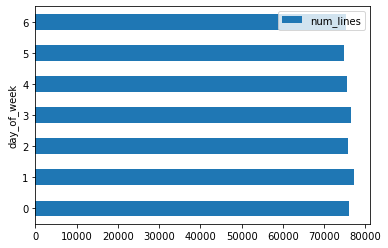

In [30]:
grouped = df.groupby('day_of_week').sum()
grouped.plot(kind='barh')
plt.show()

- Remove the index of `grouped` 
- Print the first five rows of `grouped` 

In [34]:
# Reset the index of grouped
grouped = grouped.reset_index()

# Print the first five rows of grouped
grouped.head()

,day_of_week,num_lines
0,0,76110
1,1,77303
2,2,75713
3,3,76607
4,4,75573


Add a new column `'is_weekend'` that maps the `'day_of_week'` column using the dictionary `weekend_map` 

In [35]:
# Use this dictionary to create a new column 
weekend_map = {0:False, 1:False, 2:False, 3:False, 4:False, 5:True, 6:True}

# Add a new column 'is_weekend' that maps the 'day_of_week' column using weekend_map
grouped['is_weekend'] = grouped['day_of_week'].map(weekend_map)

In [40]:
# Group the data by weekend/weekday and plot the sum of the numeric columns
wkend = grouped.groupby('is_weekend').sum()
wkend[[9,10]].plot(kind='barh')
plt.show()

NameError: name 'columns' is not defined

Remove the `'c/a'` and `'scp'` columns. 

In [41]:
# Remove the 'c/a' and 'scp' columns
df = df.drop('c/a', axis=1)
df = df.drop('scp', axis=1)
df.head(2)

,linename,unit,station,division,date,time,desc,entries,exits,num_lines,day_of_the_week,day_of_week
0,NQR456W,R051,59 ST,BMT,2018-08-25,00:00:00,REGULAR,0006736067,0002283184 ...,7,Saturday,5
1,NQR456W,R051,59 ST,BMT,2018-08-25,04:00:00,REGULAR,0006736087,0002283188 ...,7,Saturday,5


## Analysis Question 

What is misleading about the day of week and weekend/weekday charts you just plotted?

# Your answer here 

I can't really say what's misleading because the graph wouldn't load.
I tried doing it my way, but it wouldn't load even when I followed the solution
exactly from Github.

It keeps saying that there are no columns "entries" or "exits"- I don't know how to solve this yet, google hasn't helped me.

## Summary

Great! You practiced your data cleanup skills using Pandas.